# Лабораторная работа “ЛАЗЕРНО-ФЛУОРЕСЦЕНТНАЯ СПЕКТРОСКОПИЯ МОЛЕКУЛ”
## В  настоящем блокноте представлена  программа для  выполнения следующих задач:<br>
### 1)Усреднение спектра и определение  дрейфа длины волны лазера (если измерений больше одного)
### 2) Описание спектра

In [81]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import argrelextrema
from scipy.signal import find_peaks, peak_widths,savgol_filter
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import copy
import math
from scipy.stats import t

In [82]:
data_path =  "spectroscopy_lab_data"
save_path = "results"

In [83]:
def unpack(path, mod): 
    file = open(path + "\\" + mod + ".dat", 'r' )
    data = file.readlines()
    data = [line.rstrip().replace("\t",',').split(",") for line in data]
    settings = data[:4]
    del data[:5]
    del data[-1]
    data = np.array(data).astype('float')
    wavelength = data[:,0]
    signal = data[:, 1]
    return  settings, wavelength, signal

mod = ["spectrum"]

In [84]:
settings, wavelength, signal  =  unpack(data_path,"spectrum")

Нарисуем графики 

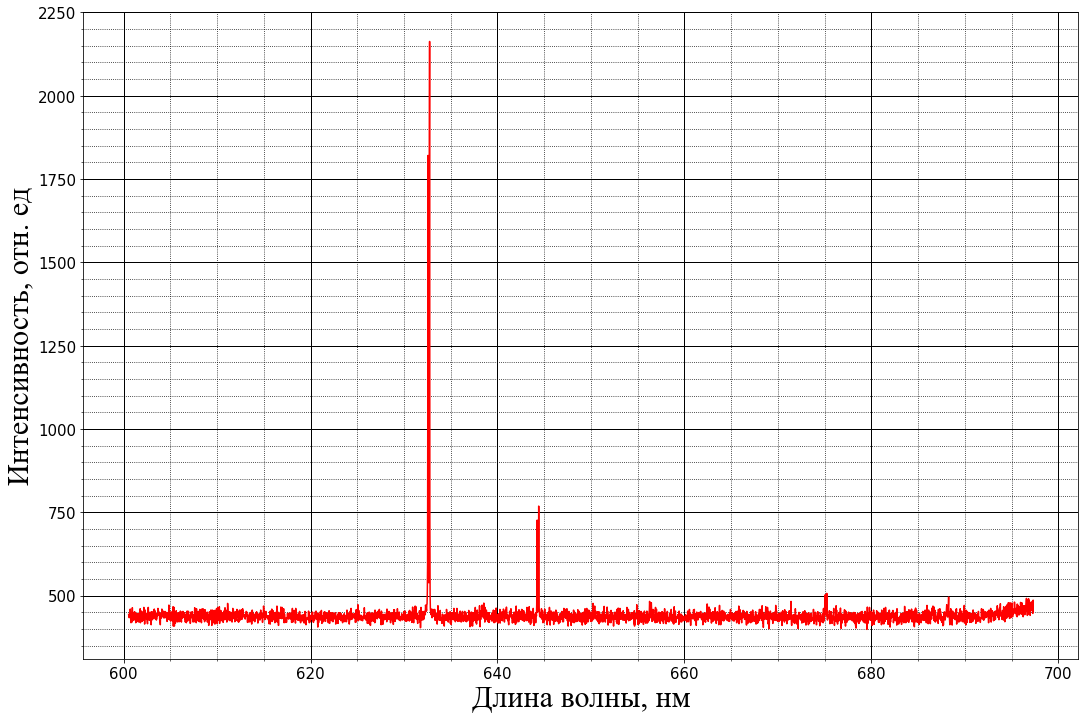

In [85]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength,  signal, c = 'r') 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "full_spectrum.jpg")

Более детальное рассмотрение пиков

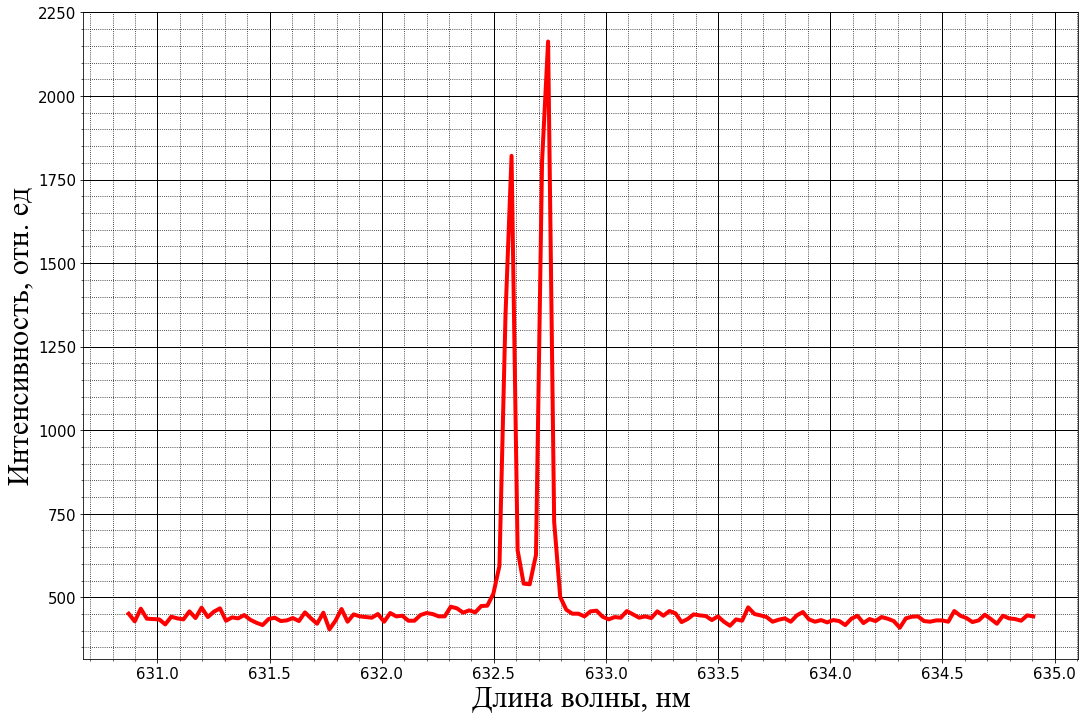

In [86]:

left = 1100
right = 1250
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength[left:right],  signal[left:right], c = 'r',linewidth = 4 ) 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "first_doublet.jpg")

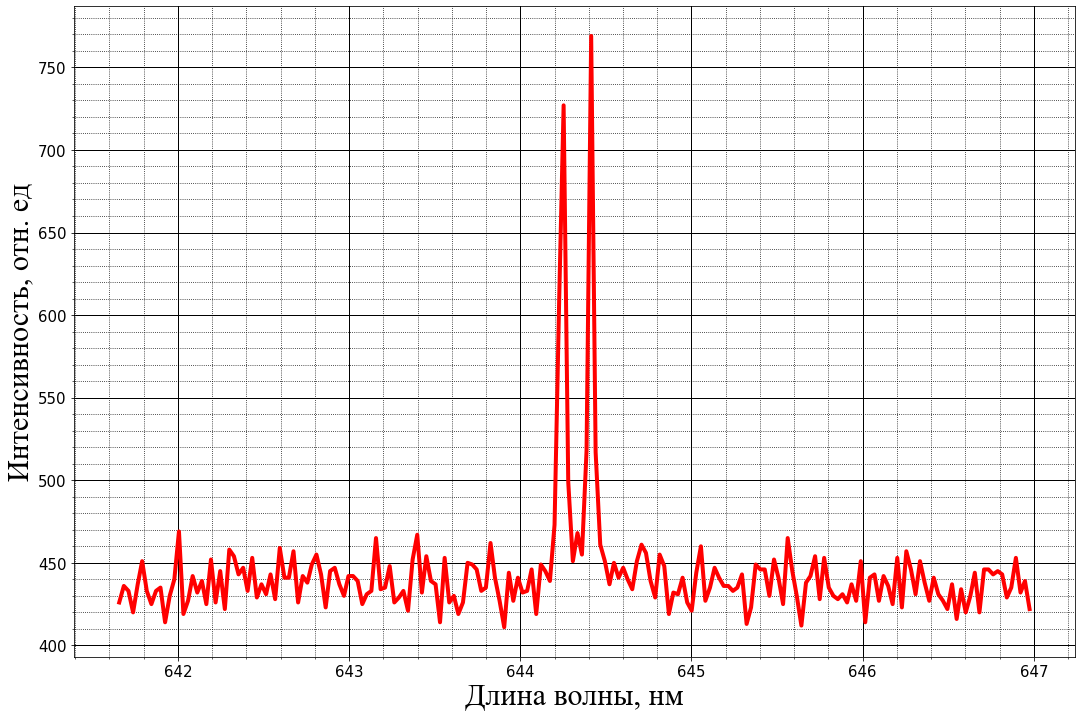

In [87]:
left = 1500
right = 1700
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength[left:right],  signal[left:right], c = 'r',linewidth = 4 ) 
ax.set_xlabel('Длина волны, нм',{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
ax.set_ylabel("Интенсивность, отн. ед",{'fontname':'Times New Roman'},fontweight='light',color='k', fontsize=30)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()

#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.savefig(save_path + "\\" + "second_doublet.jpg")